RFM analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

RECENCY (R): Days since last purchase

FREQUENCY (F): Total number of purchases

MONETARY VALUE (M): Total money this customer spent.



In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv("/content/drive/My Drive/Amazon_Dataset/Customer_Lifetime_Ratio.csv")


In [ ]:
df2=df1.drop(['Customer Lifetime value', 'CLV_Category','Total Profit'], axis=1)

In [ ]:
df2['Days_since_prior_order'] = np.random.randint(1,30, df1.shape[0])

In [ ]:
df2

,Unnamed: 0,User Name,user_Id,Total_Visits,Total_Price,Days_since_prior_order
0,0,Adapter,1,4,112.8,21
1,1,truman,2,48,57.6,4
2,2,DaveZ,3,37,26.3,25
3,3,Shacks,4,43,10.6,14
4,4,explore42,5,29,56.8,28
...,...,...,...,...,...,...
34655,34655,Kris,6533,28,18.2,26
34656,34656,Jonathan Stewart,26787,11,106.4,9
34657,34657,J Lawson,26788,27,33.0,13
34658,34658,Just the Buyer,26789,23,103.4,24


In [ ]:
recency_df = df2.groupby(by='user_Id', as_index=False)['Days_since_prior_order'].mean().astype(int) 
recency_df.columns = ['user_Id','Days_since_prior_order']
recency_df.head()

,user_Id,Days_since_prior_order
0,0,11
1,1,21
2,2,4
3,3,25
4,4,14


# Recency

Avg of how many days ago was the User's last purchase.

# Frequency
How many times a User purchased from Amazon

# Monetary

How much money did the User spent over time.Creating a random value column to represent Total Price


In [ ]:
df2.rename(columns = {'Days_since_prior_order': 'Recency'}, inplace=True)

In [ ]:
df2.rename(columns = {'Total_Visits': 'Frequency'}, inplace=True)

In [ ]:
df2.rename(columns = {'Total_Price': 'Monetary'}, inplace=True)

In [ ]:
df2=df2.drop(['Unnamed: 0'], axis=1)

In [ ]:
df2

,User Name,user_Id,Frequency,Monetary,Recency
0,Adapter,1,4,112.8,21
1,truman,2,48,57.6,4
2,DaveZ,3,37,26.3,25
3,Shacks,4,43,10.6,14
4,explore42,5,29,56.8,28
...,...,...,...,...,...
34655,Kris,6533,28,18.2,26
34656,Jonathan Stewart,26787,11,106.4,9
34657,J Lawson,26788,27,33.0,13
34658,Just the Buyer,26789,23,103.4,24


# Customer Segment with RFM Model

Calculating RFM using Quartiles. 

Assigning a score from 1 to 4 to Recency, Frequency and Monetary. Four is the highest value, and one is the lowest value. A final RFM score is calculated by combining individual RFM score numbers.

In [ ]:
quantiles = df2.quantile(q=[0.25,0.5,0.75])
quantiles

,user_Id,Frequency,Monetary,Recency
0.25,4220.75,13.0,37.6,8.0
0.50,10816.50,25.0,65.0,15.0
0.75,18504.25,37.0,92.2,22.0


In [ ]:
quantiles.to_dict()

{'Frequency': {0.25: 13.0, 0.5: 25.0, 0.75: 37.0},
 'Monetary': {0.25: 37.6, 0.5: 65.0, 0.75: 92.2},
 'Recency': {0.25: 8.0, 0.5: 15.0, 0.75: 22.0},
 'user_Id': {0.25: 4220.75, 0.5: 10816.5, 0.75: 18504.25}}

Creating 2 segment since ideally we want high frequency and monetary but low recency. 
(x = value, p = recency, monetary_value, frequency, d = quartiles dict)


In [ ]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
rfm_segmentation = df2
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [ ]:
rfm_segmentation.head()

,User Name,user_Id,Frequency,Monetary,Recency,R_Quartile,F_Quartile,M_Quartile
0,Adapter,1,4,112.8,21,2,1,4
1,truman,2,48,57.6,4,4,4,2
2,DaveZ,3,37,26.3,25,1,3,1
3,Shacks,4,43,10.6,14,3,4,1
4,explore42,5,29,56.8,28,1,3,2


To represent customer segmentation, Combining the scores (R_Quartile, F_Quartile,M_Quartile) together.

Best Recency score = 4: most recently purchase.

Best Frequency score = 4: most quantity purchase. 

Best Monetary score = 4: spent the most.

In [ ]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,User Name,user_Id,Frequency,Monetary,Recency,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,Adapter,1,4,112.8,21,2,1,4,214
1,truman,2,48,57.6,4,4,4,2,442
2,DaveZ,3,37,26.3,25,1,3,1,131
3,Shacks,4,43,10.6,14,3,4,1,341
4,explore42,5,29,56.8,28,1,3,2,132


In [ ]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,User Name,user_Id,Frequency,Monetary,Recency,R_Quartile,F_Quartile,M_Quartile,RFMScore
4997,John,485,49,119.9,1,4,4,4,444
13775,Rjbjr,11556,45,119.9,1,4,4,4,444
29330,mike,296,41,119.8,3,4,4,4,444
26870,KnightRider130,21106,42,119.8,4,4,4,4,444
23798,jportillo,18899,42,119.8,3,4,4,4,444
26619,Julie,4955,42,119.8,7,4,4,4,444
16504,zeke,1309,42,119.7,6,4,4,4,444
19707,KBTechGuy,15964,40,119.6,6,4,4,4,444
2741,Scott77,2539,48,119.4,7,4,4,4,444
11184,tphillips,9547,47,119.4,4,4,4,4,444


Customers in each Segment 

In [ ]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))


Best Customers:  603
Loyal Customers:  8460
Big Spenders:  8638
Almost Lost:  526
Lost Customers:  579


In [ ]:
rfm_segmentation['Total Score'] = rfm_segmentation['R_Quartile'] + rfm_segmentation['F_Quartile'] +rfm_segmentation['M_Quartile']

In [ ]:
rfm_segmentation

,User Name,user_Id,Frequency,Monetary,Recency,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total Score
0,Adapter,1,4,112.8,21,2,1,4,214,7
1,truman,2,48,57.6,4,4,4,2,442,10
2,DaveZ,3,37,26.3,25,1,3,1,131,5
3,Shacks,4,43,10.6,14,3,4,1,341,8
4,explore42,5,29,56.8,28,1,3,2,132,6
...,...,...,...,...,...,...,...,...,...,...
34655,Kris,6533,28,18.2,26,1,3,1,131,5
34656,Jonathan Stewart,26787,11,106.4,9,3,1,4,314,8
34657,J Lawson,26788,27,33.0,13,3,3,1,331,7
34658,Just the Buyer,26789,23,103.4,24,1,2,4,124,7


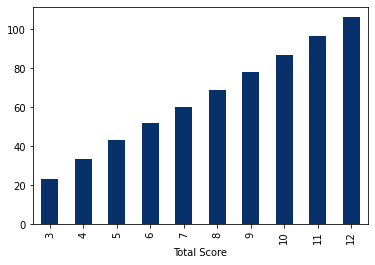

In [ ]:
rfm_segmentation.groupby('Total Score').agg('Monetary').mean().plot(kind='bar', colormap='Blues_r')

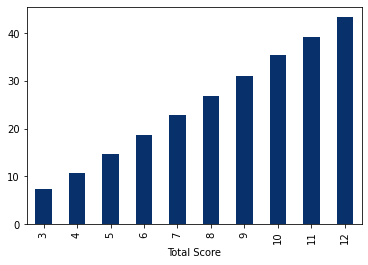

In [ ]:
rfm_segmentation.groupby('Total Score').agg('Frequency').mean().plot(kind='bar', colormap='Blues_r')

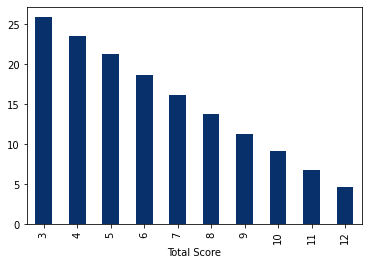

In [ ]:
rfm_segmentation.groupby('Total Score').agg('Recency').mean().plot(kind='bar', colormap='Blues_r')